# Python Week 1 worksheet



The purpose of this Python notebook is to practice with sampling from a distribution with the __NumPy Package__.

_Attention:_ Don't forget to import the necessary packages!

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

1. Simulate 100,000 realizations from the binomial distribution with $N$=2500 trails and success probability $p$=0.45.

In [5]:
# Sample binomial distributed random number (check numpy documents for details!)
sample = npr.binomial(2500,0.45,100000)
sample[0:5]

array([1104, 1126, 1106, 1088, 1151])

In [7]:
# above answer varies every time you run it
# after using the seed, every time the result will be the same
npr.seed(seed = 160)
sample = npr.binomial(2500,0.45,100000)
sample[0:5]

array([1136, 1129, 1117, 1108, 1151])

2. Compute the empirical mean and the empirical standard deviation of your sample and compare these values with the theoretical values.

In [8]:
# theoretical:
Mean_the = 2500 * 0.45
Std_the  = np.sqrt(2500 * 0.45 * (1 - 0.45))
# empirical
Mean_emp = sample.mean()
Std_emp  = sample.std()

In [10]:
Mean_the, Mean_emp, Std_the, Std_emp

(1125.0, 1125.05449, 24.8746859276655, 24.88304163159922)

3. Plot a histogram of your sample with the absolute number of counts for each bin. Choose 50 bins.

For details on pyplot.hist:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

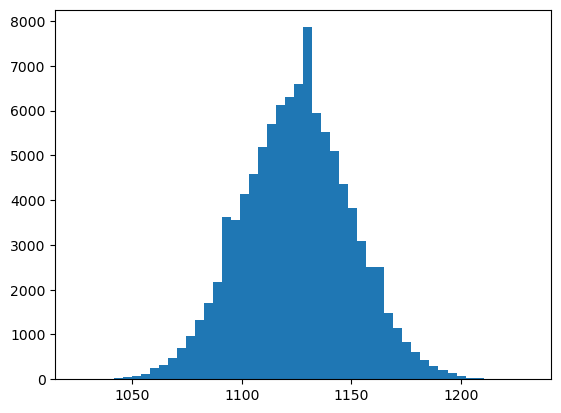

In [12]:
a, b, c = plt.hist(x = sample, bins = 50, density = False)

4. Standardize the sample, that is, subtract the emprical mean and divide by the empirical standard deviation.

In [13]:
sample_standard = (sample - Mean_emp) / Std_emp

5. Plot a histogram of your standardized sample with the counts normalized to form a **probability density**. Choose again 50 bins. 

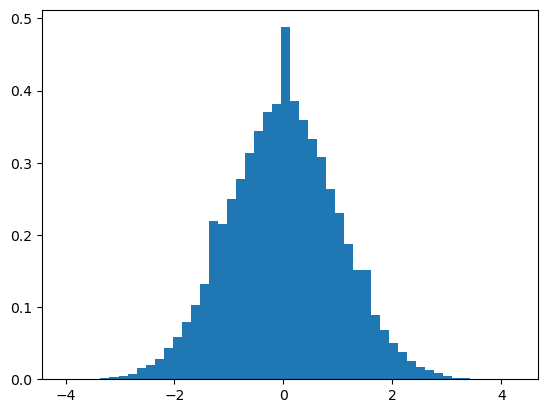

In [15]:
count, bins, patches = plt.hist(sample_standard, bins = 50, density = True)

6. Compare the  above histogram with the density of the standard normal distribution by adding its density into the histogram plot. This is based on the fact that a binomial distr with large N is approximately Gaussian.

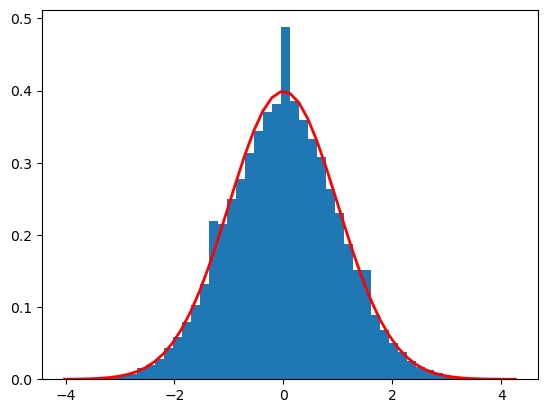

In [18]:
import scipy
from scipy.stats import norm

#Get the histogram
count, bins, patches = plt.hist(sample_standard, 50, density = True)

#Standard Normal Density Curve
plt.plot(bins, norm.pdf(bins,0,1), linewidth=2, color='r')
plt.show()

## How to sample from any discrete probability distribution?

For example, how to sample $1000$ $i.i.d.$ realizations of $X$ from a discrete distribution with 
$$\mathbb{P}(X = 2) = 0.2,\mathbb{P}(X = 3) = 0.7,\mathbb{P}(X = 5) = 0.1$$

### Without built-in Python function

In [19]:
# Uniform (0,1) random samples
unif_sample = npr.rand(1000)
X_sample = np.zeros(1000)

# Use cumulative probabilities
for i in range(1000):
    if unif_sample[i] < 0.2:
        X_sample[i] = 2
    elif unif_sample[i] < 0.9:
        X_sample[i] = 3
    else:
        X_sample[i] = 5

(array([203.,   0.,   0., 692.,   0.,   0.,   0.,   0.,   0.,   0., 105.]),
 array([2.        , 2.27272727, 2.54545455, 2.81818182, 3.09090909,
        3.36363636, 3.63636364, 3.90909091, 4.18181818, 4.45454545,
        4.72727273, 5.        ]),
 <BarContainer object of 11 artists>)

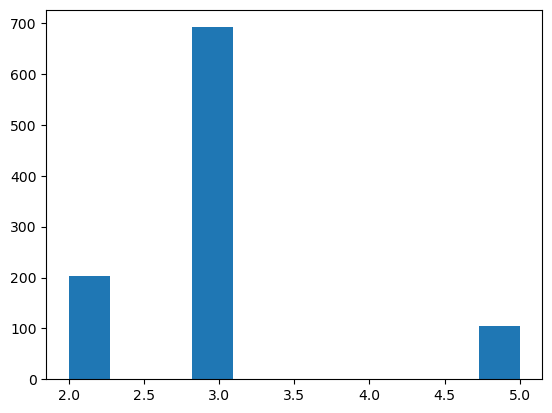

In [21]:
# Check the distribution with histogram
plt.hist(X_sample, bins = 'auto', density = False)

### With built-in Python function

In [23]:
# How do we know which function to call? Ask Google or Chatgpt!
X_sample = npr.choice([2,3,5],size = 1000, p = [0.2,0.7,0.1])

(array([210.,   0.,   0., 694.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([2.        , 2.27272727, 2.54545455, 2.81818182, 3.09090909,
        3.36363636, 3.63636364, 3.90909091, 4.18181818, 4.45454545,
        4.72727273, 5.        ]),
 <BarContainer object of 11 artists>)

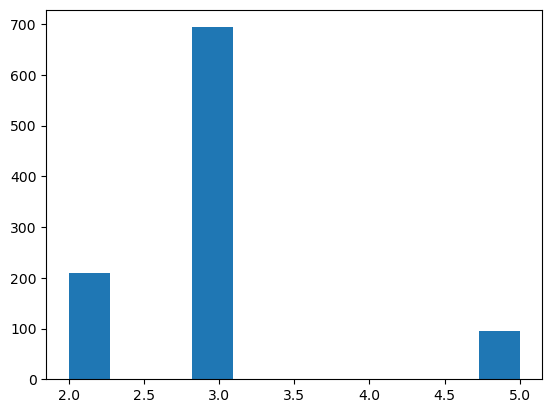

In [24]:
# Check the distribution with histogram
plt.hist(X_sample, bins = 'auto', density = False)

## Important Tips for Coding in Python

1. Indentation matters!

In [32]:
# An example where indentation makes difference
a = 0
if a == 0:
    a = 1
print(a)

IndentationError: expected an indented block after 'if' statement on line 3 (905227445.py, line 4)

2. All array structures start with index 0 but not 1!

In [37]:
# This is very different from Matlab or R
a = np.arange(10)
print(a)
print(a[0])
print(a[1])
print(a[-1])

[0 1 2 3 4 5 6 7 8 9]
0
1
9
